# Model Predictions Analysis
Analyzing binary classification and BDI regression predictions from three models:
1. Small NN Milestone (original)
2. Small NN Low LR (lower learning rate)
3. Two Layers (two hidden layers with 10 units each)

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, mean_absolute_error, r2_score

# Set style for better-looking plots
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)

## Load Binary Classification Predictions

In [30]:
# Load binary classification predictions
binary_milestone = pd.read_csv('binary_classification_predictions_small_nn_milestone.csv')
binary_low_lr = pd.read_csv('binary_classification_predictions_small_nn_low_lr.csv')
binary_two_layers = pd.read_csv('binary_classification_predictions_two_layers.csv')

print("Binary Classification - Small NN Milestone:")
print(binary_milestone.head())
print(f"\nShape: {binary_milestone.shape}")
print(f"Columns: {binary_milestone.columns.tolist()}")

Binary Classification - Small NN Milestone:
   True_Depression  Predicted_Probability
0            False               0.465529
1            False               0.465529
2             True               0.465529
3            False               0.465529
4            False               0.465529

Shape: (43, 2)
Columns: ['True_Depression', 'Predicted_Probability']


## Load BDI Regression Predictions

In [31]:
# Load BDI regression predictions
bdi_milestone = pd.read_csv('bdi_regression_predictions_small_nn_milestone.csv')
bdi_low_lr = pd.read_csv('bdi_regression_predictions_small_nn_low_lr.csv')
bdi_two_layers = pd.read_csv('bdi_regression_predictions_two_layers.csv')

print("BDI Regression - Small NN Milestone:")
print(bdi_milestone.head())
print(f"\nShape: {bdi_milestone.shape}")
print(f"Columns: {bdi_milestone.columns.tolist()}")

BDI Regression - Small NN Milestone:
   True_BDI  Predicted_BDI
0       2.0       2.415835
1       5.0       2.685603
2      34.0       5.896173
3      12.0       5.590448
4       9.0       4.011202

Shape: (42, 2)
Columns: ['True_BDI', 'Predicted_BDI']


## Binary Classification: Confusion Matrices

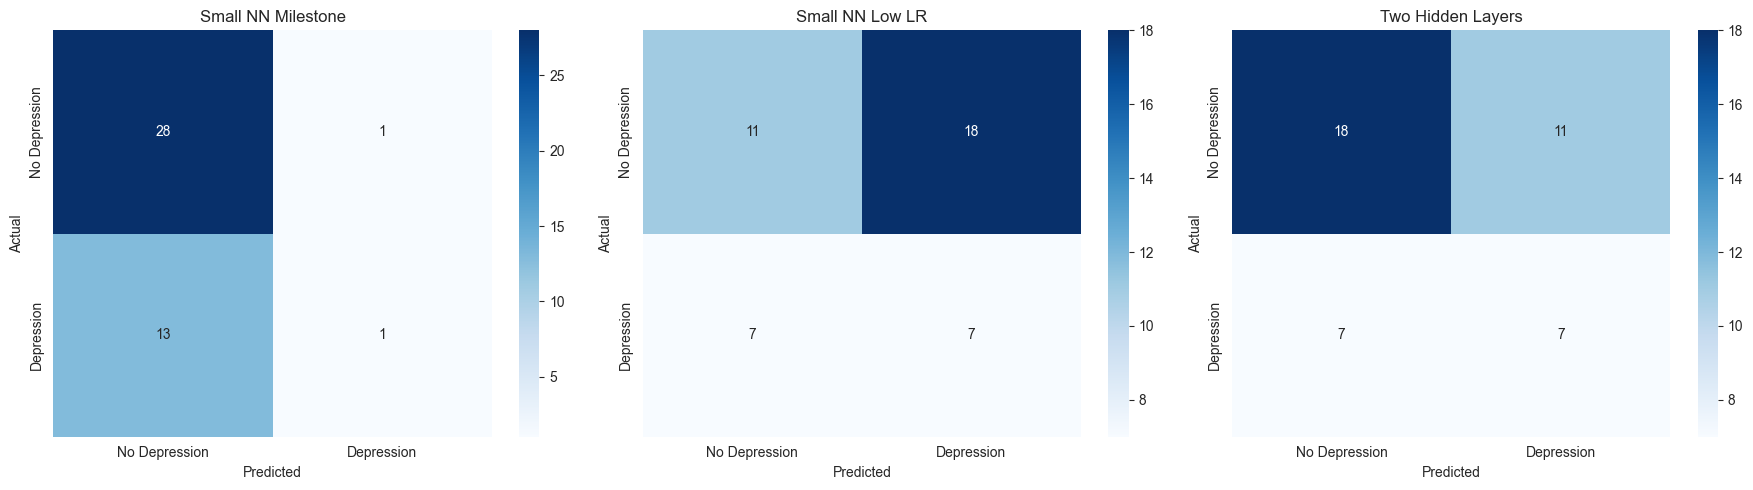

In [15]:
def plot_confusion_matrix(y_true, y_pred, title, ax):
    """Plot confusion matrix on given axes"""
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax, 
                xticklabels=['No Depression', 'Depression'],
                yticklabels=['No Depression', 'Depression'])
    ax.set_title(title)
    ax.set_ylabel('Actual')
    ax.set_xlabel('Predicted')
    return cm

# Create figure with 3 subplots for confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Assuming columns are 'actual' and 'predicted' - adjust if needed
# You may need to modify these column names based on your actual CSV structure
actual_col = binary_milestone.columns[0]  # Adjust if needed
predicted_col = binary_milestone.columns[1]  # Adjust if needed

# Plot confusion matrices
cm1 = plot_confusion_matrix(binary_milestone[actual_col], 
                            ( binary_milestone[predicted_col] > 0.5).astype(int), 
                            'Small NN Milestone', axes[0])

cm2 = plot_confusion_matrix(binary_low_lr[actual_col], 
                            ( binary_low_lr[predicted_col] > 0.5).astype(int), 
                            'Small NN Low LR', axes[1])

cm3 = plot_confusion_matrix(binary_two_layers[actual_col], 
                            ( binary_two_layers[predicted_col] > 0.5).astype(int), 
                            'Two Hidden Layers', axes[2])

plt.tight_layout()
plt.savefig('binary_confusion_matrices.png', dpi=300, bbox_inches='tight')
plt.show()

## Binary Classification: Performance Metrics

In [18]:
def print_classification_metrics(y_true, y_pred, model_name):
    """Print classification metrics"""
    print(f"\n{'='*60}")
    print(f"{model_name}")
    print(f"{'='*60}")
    print(classification_report(y_true, y_pred,
                                target_names=['No Depression', 'Depression']))

    # Calculate accuracy
    accuracy = (y_true == y_pred).mean()
    print(f"Accuracy: {accuracy:.4f}")

def get_classification_report_df(y_true, y_pred, model_name):
    """Get classification report as DataFrame"""
    from sklearn.metrics import classification_report
    report = classification_report(y_true, y_pred,
                                   target_names=['No Depression', 'Depression'],
                                   output_dict=True)
    df = pd.DataFrame(report).transpose()
    df['model'] = model_name
    return df

# Print metrics for all models
print_classification_metrics(binary_milestone[actual_col],
                           (binary_milestone[predicted_col] > 0.5).astype(int),
                           "Small NN Milestone")

print_classification_metrics(binary_low_lr[actual_col],
                           (binary_low_lr[predicted_col] > 0.5).astype(int),
                           "Small NN Low LR")

print_classification_metrics(binary_two_layers[actual_col],
                           (binary_two_layers[predicted_col] > 0.5).astype(int),
                           "Two Hidden Layers")

# Generate classification reports as DataFrames
report_milestone = get_classification_report_df(binary_milestone[actual_col],
                                                (binary_milestone[predicted_col] > 0.5).astype(int),
                                                "Small NN Milestone")
report_low_lr = get_classification_report_df(binary_low_lr[actual_col],
                                            (binary_low_lr[predicted_col] > 0.5).astype(int),
                                            "Small NN Low LR")
report_two_layers = get_classification_report_df(binary_two_layers[actual_col],
                                                 (binary_two_layers[predicted_col] > 0.5).astype(int),
                                                 "Two Hidden Layers")

# Save individual classification reports
report_milestone.to_csv('classification_report_small_nn_milestone.csv')
report_low_lr.to_csv('classification_report_small_nn_low_lr.csv')
report_two_layers.to_csv('classification_report_two_layers.csv')

# Combine all reports into one CSV
all_reports = pd.concat([report_milestone, report_low_lr, report_two_layers])
all_reports.to_csv('classification_reports_all_models.csv')

print("\n" + "="*60)
print("Classification reports saved to CSV files:")
print("  - classification_report_small_nn_milestone.csv")
print("  - classification_report_small_nn_low_lr.csv")
print("  - classification_report_two_layers.csv")
print("  - classification_reports_all_models.csv (combined)")
print("="*60)


Small NN Milestone
               precision    recall  f1-score   support

No Depression       0.68      0.97      0.80        29
   Depression       0.50      0.07      0.12        14

     accuracy                           0.67        43
    macro avg       0.59      0.52      0.46        43
 weighted avg       0.62      0.67      0.58        43

Accuracy: 0.6744

Small NN Low LR
               precision    recall  f1-score   support

No Depression       0.61      0.38      0.47        29
   Depression       0.28      0.50      0.36        14

     accuracy                           0.42        43
    macro avg       0.45      0.44      0.41        43
 weighted avg       0.50      0.42      0.43        43

Accuracy: 0.4186

Two Hidden Layers
               precision    recall  f1-score   support

No Depression       0.72      0.62      0.67        29
   Depression       0.39      0.50      0.44        14

     accuracy                           0.58        43
    macro avg       0.

In [34]:
#get Depression values from all_reports
depression_values = all_reports.loc['accuracy']

#round to 4 decimal places
depression_values = depression_values.round(4)
depression_values.to_clipboard()

## BDI Regression: Predicted vs. Actual Plots

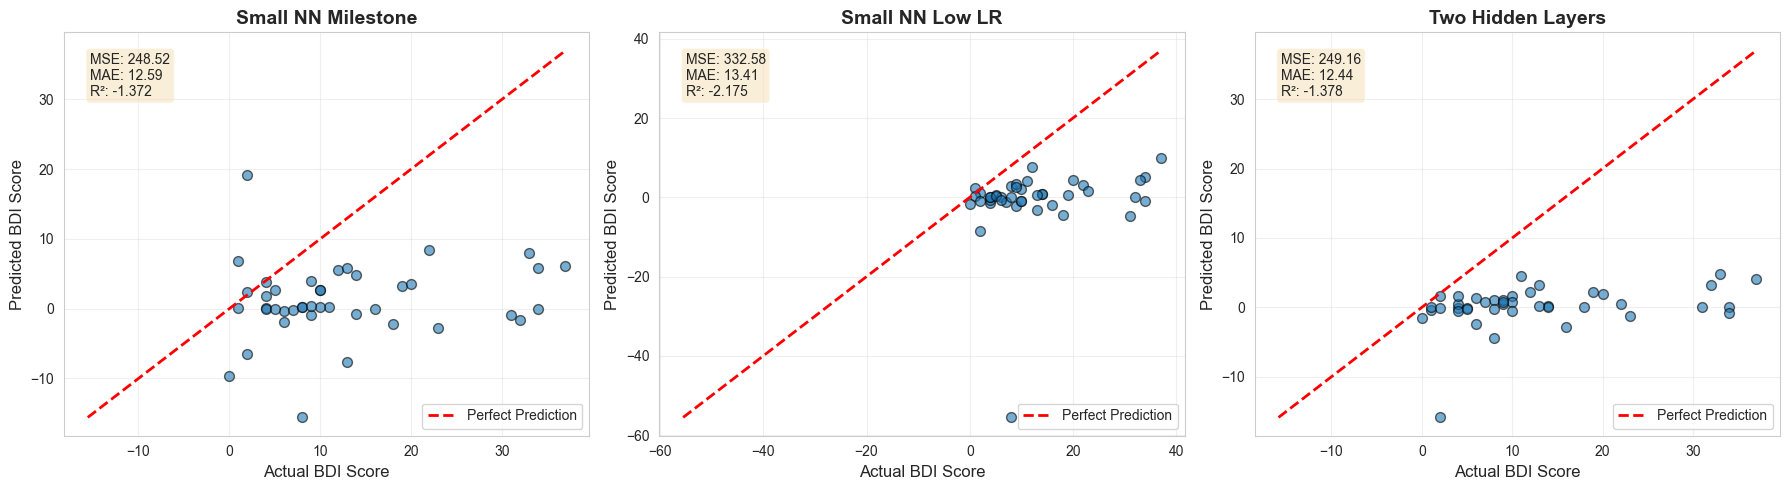

In [32]:
def plot_predictions_vs_actual(y_true, y_pred, title, ax):
    """Plot predicted vs actual values with perfect prediction line"""
    ax.scatter(y_true, y_pred, alpha=0.6, edgecolors='k', s=50)
    
    # Plot perfect prediction line
    min_val = min(y_true.min(), y_pred.min())
    max_val = max(y_true.max(), y_pred.max())
    ax.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Perfect Prediction')
    
    ax.set_xlabel('Actual BDI Score', fontsize=12)
    ax.set_ylabel('Predicted BDI Score', fontsize=12)
    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    # Calculate metrics
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    # Add metrics to plot
    metrics_text = f'MSE: {mse:.2f}\nMAE: {mae:.2f}\nR²: {r2:.3f}'
    ax.text(0.05, 0.95, metrics_text, transform=ax.transAxes, 
            fontsize=10, verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Create figure with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Assuming columns are 'actual' and 'predicted' - adjust if needed
actual_col_bdi = bdi_milestone.columns[0]  # Adjust if needed
predicted_col_bdi = bdi_milestone.columns[1]  # Adjust if needed

# Plot predicted vs actual for all models
plot_predictions_vs_actual(bdi_milestone[actual_col_bdi], 
                          bdi_milestone[predicted_col_bdi], 
                          'Small NN Milestone', axes[0])

plot_predictions_vs_actual(bdi_low_lr[actual_col_bdi], 
                          bdi_low_lr[predicted_col_bdi], 
                          'Small NN Low LR', axes[1])

plot_predictions_vs_actual(bdi_two_layers[actual_col_bdi], 
                          bdi_two_layers[predicted_col_bdi], 
                          'Two Hidden Layers', axes[2])

plt.tight_layout()
plt.savefig('bdi_predicted_vs_actual.png', dpi=300, bbox_inches='tight')
plt.show()

## BDI Regression: Performance Metrics

In [ ]:
def print_regression_metrics(y_true, y_pred, model_name):
    """Print regression metrics"""
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    print(f"\n{'='*60}")
    print(f"{model_name}")
    print(f"{'='*60}")
    print(f"Mean Squared Error (MSE):     {mse:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"Mean Absolute Error (MAE):    {mae:.4f}")
    print(f"R² Score:                     {r2:.4f}")

# Print metrics for all models
print_regression_metrics(bdi_milestone[actual_col_bdi], 
                        bdi_milestone[predicted_col_bdi], 
                        "Small NN Milestone")

print_regression_metrics(bdi_low_lr[actual_col_bdi], 
                        bdi_low_lr[predicted_col_bdi], 
                        "Small NN Low LR")

print_regression_metrics(bdi_two_layers[actual_col_bdi], 
                        bdi_two_layers[predicted_col_bdi], 
                        "Two Hidden Layers")

## BDI Regression: Residual Analysis

In [ ]:
def plot_residuals(y_true, y_pred, title, ax):
    """Plot residuals (prediction errors)"""
    residuals = y_true - y_pred
    ax.scatter(y_pred, residuals, alpha=0.6, edgecolors='k', s=50)
    ax.axhline(y=0, color='r', linestyle='--', lw=2)
    ax.set_xlabel('Predicted BDI Score', fontsize=12)
    ax.set_ylabel('Residuals (Actual - Predicted)', fontsize=12)
    ax.set_title(f'{title}\nResidual Plot', fontsize=14, fontweight='bold')
    ax.grid(True, alpha=0.3)

# Create figure with 3 subplots for residuals
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

plot_residuals(bdi_milestone[actual_col_bdi], 
              bdi_milestone[predicted_col_bdi], 
              'Small NN Milestone', axes[0])

plot_residuals(bdi_low_lr[actual_col_bdi], 
              bdi_low_lr[predicted_col_bdi], 
              'Small NN Low LR', axes[1])

plot_residuals(bdi_two_layers[actual_col_bdi], 
              bdi_two_layers[predicted_col_bdi], 
              'Two Hidden Layers', axes[2])

plt.tight_layout()
plt.savefig('bdi_residuals.png', dpi=300, bbox_inches='tight')
plt.show()

## Model Comparison Summary

In [ ]:
# Create comparison dataframe for binary classification
binary_comparison = pd.DataFrame({
    'Model': ['Small NN Milestone', 'Small NN Low LR', 'Two Hidden Layers'],
    'Accuracy': [
        (binary_milestone[actual_col] == binary_milestone[predicted_col]).mean(),
        (binary_low_lr[actual_col] == binary_low_lr[predicted_col]).mean(),
        (binary_two_layers[actual_col] == binary_two_layers[predicted_col]).mean()
    ]
})

print("\n" + "="*60)
print("BINARY CLASSIFICATION COMPARISON")
print("="*60)
print(binary_comparison.to_string(index=False))

# Create comparison dataframe for BDI regression
regression_comparison = pd.DataFrame({
    'Model': ['Small NN Milestone', 'Small NN Low LR', 'Two Hidden Layers'],
    'MSE': [
        mean_squared_error(bdi_milestone[actual_col_bdi], bdi_milestone[predicted_col_bdi]),
        mean_squared_error(bdi_low_lr[actual_col_bdi], bdi_low_lr[predicted_col_bdi]),
        mean_squared_error(bdi_two_layers[actual_col_bdi], bdi_two_layers[predicted_col_bdi])
    ],
    'MAE': [
        mean_absolute_error(bdi_milestone[actual_col_bdi], bdi_milestone[predicted_col_bdi]),
        mean_absolute_error(bdi_low_lr[actual_col_bdi], bdi_low_lr[predicted_col_bdi]),
        mean_absolute_error(bdi_two_layers[actual_col_bdi], bdi_two_layers[predicted_col_bdi])
    ],
    'R²': [
        r2_score(bdi_milestone[actual_col_bdi], bdi_milestone[predicted_col_bdi]),
        r2_score(bdi_low_lr[actual_col_bdi], bdi_low_lr[predicted_col_bdi]),
        r2_score(bdi_two_layers[actual_col_bdi], bdi_two_layers[predicted_col_bdi])
    ]
})

print("\n" + "="*60)
print("BDI REGRESSION COMPARISON")
print("="*60)
print(regression_comparison.to_string(index=False))

## Visual Model Comparison

In [ ]:
# Plot comparison bars
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Binary classification accuracy comparison
axes[0].bar(binary_comparison['Model'], binary_comparison['Accuracy'], 
            color=['#1f77b4', '#ff7f0e', '#2ca02c'], alpha=0.7, edgecolor='black')
axes[0].set_ylabel('Accuracy', fontsize=12)
axes[0].set_title('Binary Classification Accuracy Comparison', fontsize=14, fontweight='bold')
axes[0].set_ylim([0, 1])
axes[0].tick_params(axis='x', rotation=15)
axes[0].grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for i, v in enumerate(binary_comparison['Accuracy']):
    axes[0].text(i, v + 0.02, f'{v:.3f}', ha='center', va='bottom', fontweight='bold')

# BDI regression MAE comparison
axes[1].bar(regression_comparison['Model'], regression_comparison['MAE'], 
            color=['#1f77b4', '#ff7f0e', '#2ca02c'], alpha=0.7, edgecolor='black')
axes[1].set_ylabel('Mean Absolute Error', fontsize=12)
axes[1].set_title('BDI Regression MAE Comparison (Lower is Better)', fontsize=14, fontweight='bold')
axes[1].tick_params(axis='x', rotation=15)
axes[1].grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for i, v in enumerate(regression_comparison['MAE']):
    axes[1].text(i, v + 0.1, f'{v:.2f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.savefig('model_comparison.png', dpi=300, bbox_inches='tight')
plt.show()